<a href="https://colab.research.google.com/github/AlexDaciuk/Algoritmos/blob/master/Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import base64

token = base64.b64decode("Njk4ZGVjMWE5Y2YyNDQ5ZmNhY2FkOWU4NDdjMDk5NWU1NTZhMDk5Yw====").decode("utf-8")

! rm -rf tp-datos-2c2020 datos
! git clone https://{token}@github.com/AlexDaciuk/tp-datos-2c2020.git
! mv tp-datos-2c2020 datos

from datos.preproc import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import RidgeClassifier
import pandas as pd

Cloning into 'tp-datos-2c2020'...
remote: Enumerating objects: 241, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 476 (delta 103), reused 125 (delta 44), pack-reused 235
Receiving objects: 100% (476/476), 10.45 MiB | 15.86 MiB/s, done.
Resolving deltas: 100% (231/231), done.


In [2]:
df_all = preprocessing.get_data()

In [3]:
df_ridge = preprocessing.preprocessing_with_missing_values(df_all)

{'alpha': 0.5}
El score general del modelo es 0.7611940298507462
La media del cross validation score con k=10 es 0.85
El accuracy del modelo es 0.7611940298507462
La precision del modelo es 0.7936507936507936
El recall del modelo es 0.5882352941176471
El f1 del modelo es 0.6756756756756757


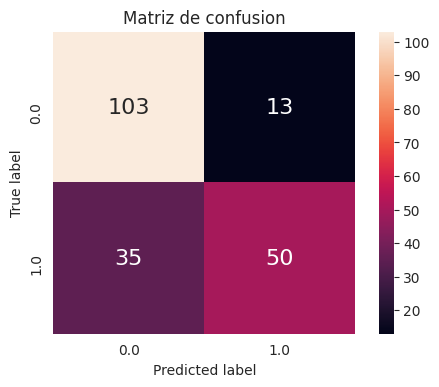

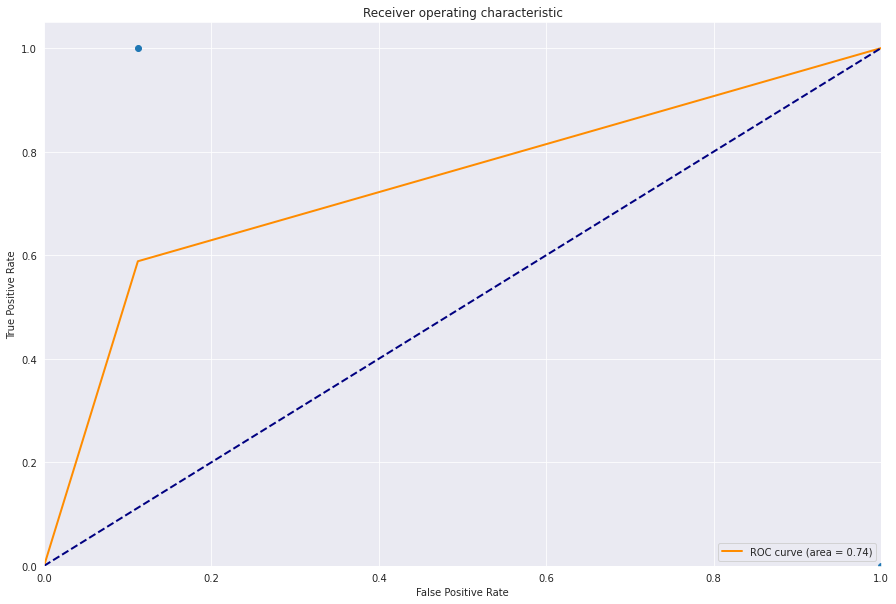

In [4]:
# Separate test and train data
X_train, X_test, y_train, y_test = train_test_split(df_ridge.drop('volveria', 1), df_ridge['volveria'])

# Ridge
parameters = {'alpha': [0.1,0.5,1,1.5,2,5,7,10,12,15]}
gscv = GridSearchCV(RidgeClassifier(), parameters)

gscv.fit(X_train, y_train)
print(gscv.best_params_)

preprocessing.report(gscv, X_train, y_train, X_test, y_test)

In [5]:
url = "https://drive.google.com/file/d/1I980-_K9iOucJO26SG5_M8RELOQ5VB6A/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

to_predict = pd.read_csv(path)

to_predict = preprocessing.preprocessing_with_missing_values(to_predict)

predicted = gscv.predict(to_predict)

print(predicted)

[1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
